In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words=300)


17464789/17464789 [==============================] - 5s 0us/step


In [2]:
train_input.shape, test_input.shape

((25000,), (25000,))

In [3]:
len(train_input[0]), len(train_input[1])

(218, 189)

In [4]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 283,
 5,
 16,
 2,
 113,
 103,
 

In [5]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=.2, random_state=42)

In [6]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [8]:
np.mean(lengths), np.median(lengths), np.max(lengths)

(239.00925, 178.0, 1854)

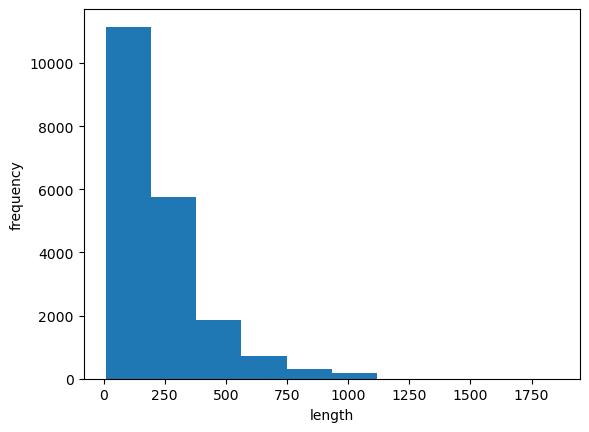

In [9]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [11]:
train_seq.shape

(20000, 100)

In [12]:
train_seq[0]

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158])

In [13]:
val_seq = pad_sequences(val_input, maxlen=100)

In [15]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
train_oh = keras.utils.to_categorical(train_seq)

In [17]:
train_oh.shape

(20000, 100, 300)

In [18]:
val_oh = keras.utils.to_categorical(val_seq)

In [19]:
val_oh.shape

(5000, 100, 300)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


313/313 [==============================] - 8s 19ms/step - loss: 0.6988 - accuracy: 0.5104 - val_loss: 0.6938 - val_accuracy: 0.5294
Epoch 2/100
  9/313 [..............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5486

c:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 16ms/step - loss: 0.6889 - accuracy: 0.5383 - val_loss: 0.6816 - val_accuracy: 0.5662
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6759 - accuracy: 0.5822 - val_loss: 0.6718 - val_accuracy: 0.5948
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6660 - accuracy: 0.6047 - val_loss: 0.6626 - val_accuracy: 0.6136
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6554 - accuracy: 0.6250 - val_loss: 0.6524 - val_accuracy: 0.6310
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6428 - accuracy: 0.6475 - val_loss: 0.6413 - val_accuracy: 0.6480
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6289 - accuracy: 0.6660 - val_loss: 0.6282 - val_accuracy: 0.6648
Epoch 8/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6143 - accuracy: 0.6842 - val_loss: 0.6150 - val_accuracy: 0.6768
Epoc

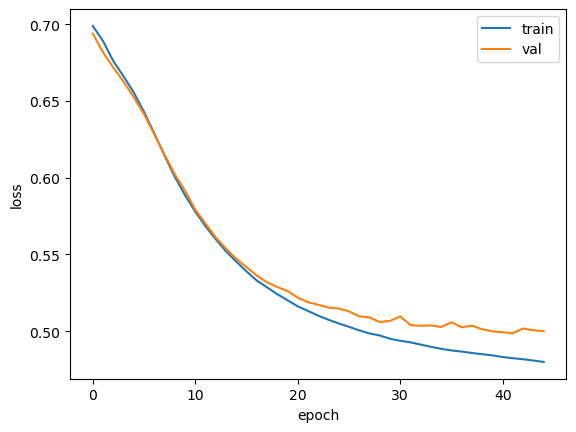

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [32]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [33]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           4800      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 16ms/step - loss: 0.6969 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5130
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6937 - accuracy: 0.5125 - val_loss: 0.6924 - val_accuracy: 0.5174
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6915 - accuracy: 0.5225 - val_loss: 0.6917 - val_accuracy: 0.5190
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6896 - accuracy: 0.5361 - val_loss: 0.6912 - val_accuracy: 0.5270
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6877 - accuracy: 0.5490 - val_loss: 0.6908 - val_accuracy: 0.5274
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6858 - accuracy: 0.5569 - val_loss: 0.6904 - val_accuracy: 0.5336
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6838 - accuracy: 0.5645 - val_loss: 0.6902 - val_accuracy:

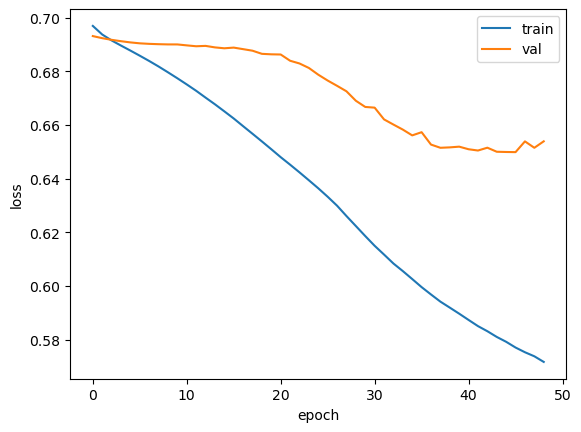

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()